<a href="https://colab.research.google.com/github/srgmnagar/space-mission-analysis/blob/main/space_mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('space_missions.csv', encoding='latin1')

In [ ]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",04-10-1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",03-11-1957,2:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",06-12-1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",01-02-1958,3:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",05-02-1958,7:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [ ]:
df.tail()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",22-07-2022,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",24-07-2022,6:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",24-07-2022,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",27-07-2022,4:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",29-07-2022,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,29.75,Success


In [ ]:
df.shape

(4630, 9)

In [ ]:
df.size

41670

In [ ]:
4630*9

41670

In [ ]:
df.dtypes


,0
Company,object
Location,object
Date,object
Time,object
Rocket,object
Mission,object
RocketStatus,object
Price,object
MissionStatus,object


In [ ]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [ ]:
df['Time']=df['Time'].astype('datetime64[ns]')

In [ ]:
df['Price']=df['Price'].replace('[\,]','',regex=True).astype('float')

<>:1: SyntaxWarning: invalid escape sequence '\,'
<>:1: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipython-input-2302379375.py:1: SyntaxWarning: invalid escape sequence '\,'
  df['Price']=df['Price'].replace('[\,]','',regex=True).astype('float')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   datetime64[ns]
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   float64       
 8   MissionStatus  4630 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 325.7+ KB


In [ ]:
df.isnull().sum()

,0
Company,0
Location,0
Date,0
Time,127
Rocket,0
Mission,0
RocketStatus,0
Price,3365
MissionStatus,0


In [ ]:
print("Null percentage for price:",round(df['Price'].isnull().sum()/len(df)*100,2),"%")
print("Null percentage for Time:",round(df['Time'].isnull().sum()/len(df)*100,2),"%")

Null percentage for price: 72.68 %
Null percentage for Time: 2.74 %


In [ ]:
df['Price'].skew()

np.float64(11.681483249606337)

In [ ]:
df['Price'].fillna(df['Price'].median(),inplace=True)

/tmp/ipython-input-3727517126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].median(),inplace=True)


In [ ]:
df['Price'].isnull().sum()

np.int64(0)

In [ ]:
df['Price'].skew()

np.float64(21.848369297250485)

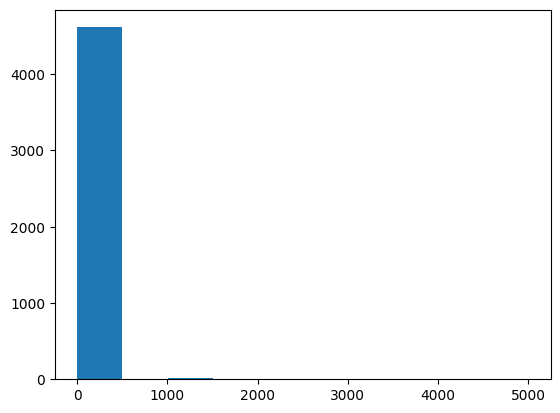

In [ ]:
plt.hist(df['Price'])
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
dfduplicated=df[df.duplicated()]
dfduplicated

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
3531,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2008-05-11,2025-10-03 00:15:00,Long March 2D,Shiyan-3 & Chuangxin-1(02),Active,29.75,Success


In [ ]:
df.drop_duplicates(inplace=True)

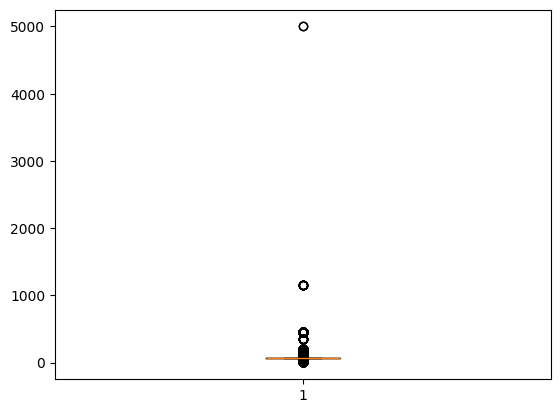

In [ ]:
plt.boxplot(df['Price'])
plt.show()

In [ ]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = df[column].apply(
      lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
  )
  return df
df=remove_outliers(df,'Price')

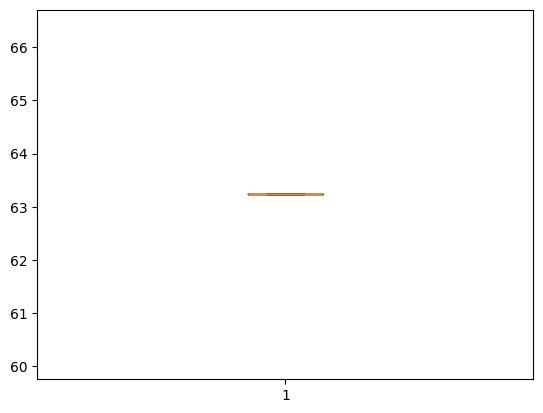

In [ ]:
plt.boxplot(df['Price'])
plt.show()

In [ ]:
df['RocketStatus'].value_counts()

,count
RocketStatus,
Retired,3620
Active,1009


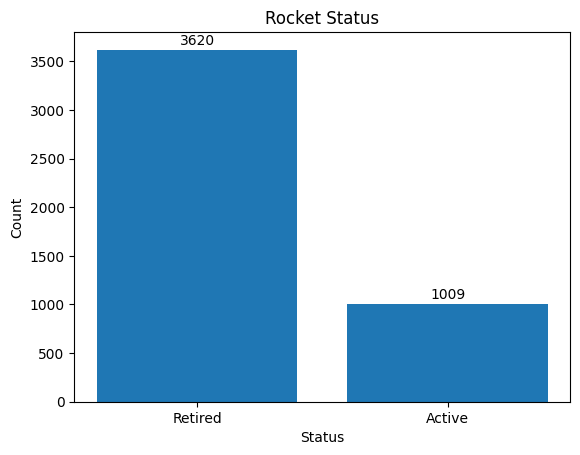

In [ ]:
plt.bar(df['RocketStatus'].value_counts().index,df['RocketStatus'].value_counts())
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Rocket Status")

# Add the exact numbers on top of each bar
counts = df['RocketStatus'].value_counts()
for i, v in enumerate(counts):
    plt.text(i, v + 50, str(v), ha='center') # Adjust the vertical position (v + 50) as needed

plt.show()

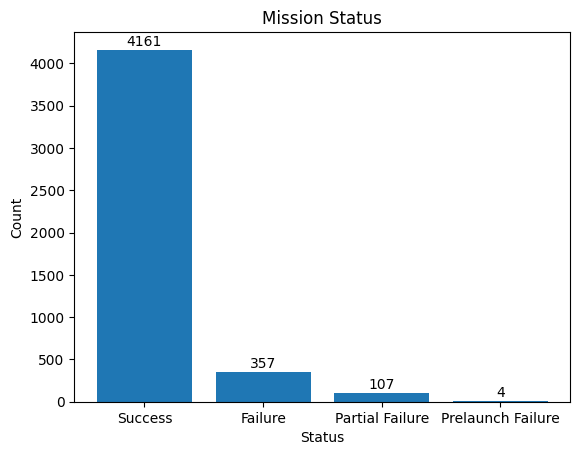

In [ ]:
plt.bar(df['MissionStatus'].value_counts().index,df['MissionStatus'].value_counts())
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Mission Status")

counts = df['MissionStatus'].value_counts()
for i, v in enumerate(counts):
    plt.text(i, v + 50, str(v), ha='center')
plt.title("Mission Status")
plt.show()

In [ ]:
success=df[df['MissionStatus']=='Success']

In [ ]:
success['Company'].value_counts()

,count
Company,
RVSN USSR,1614
CASC,317
Arianespace,282
General Dynamics,203
VKS RF,202
NASA,186
SpaceX,172
ULA,150
Boeing,131


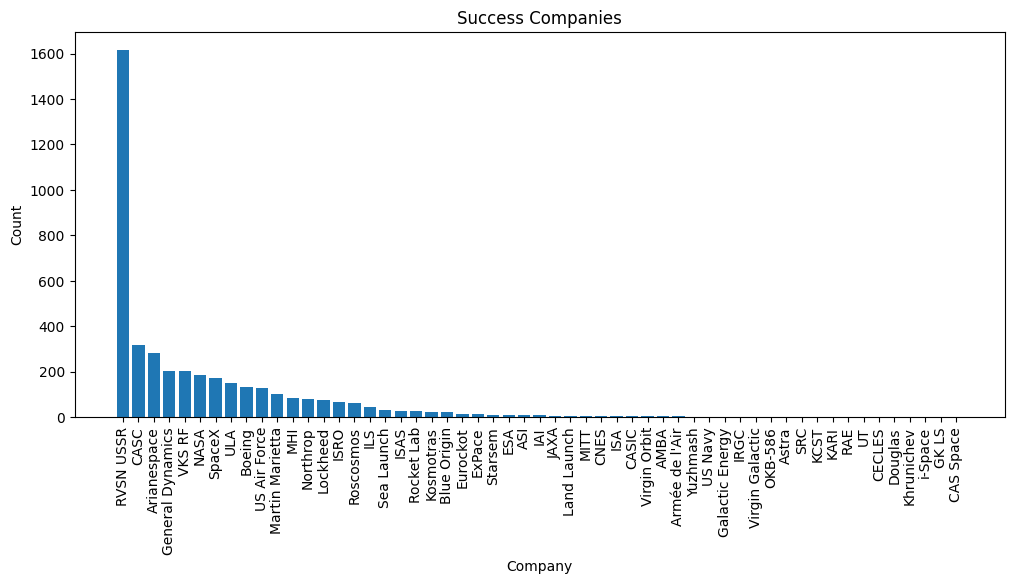

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(success['Company'].value_counts().index,success['Company'].value_counts())
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Success Companies")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

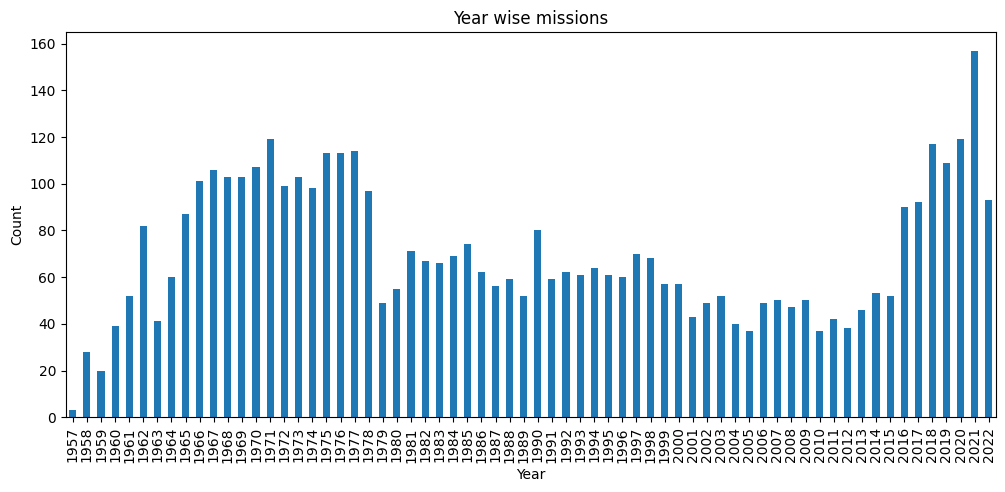

In [ ]:
plt.figure(figsize=(12,5))
df['Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year wise missions")
plt.show()

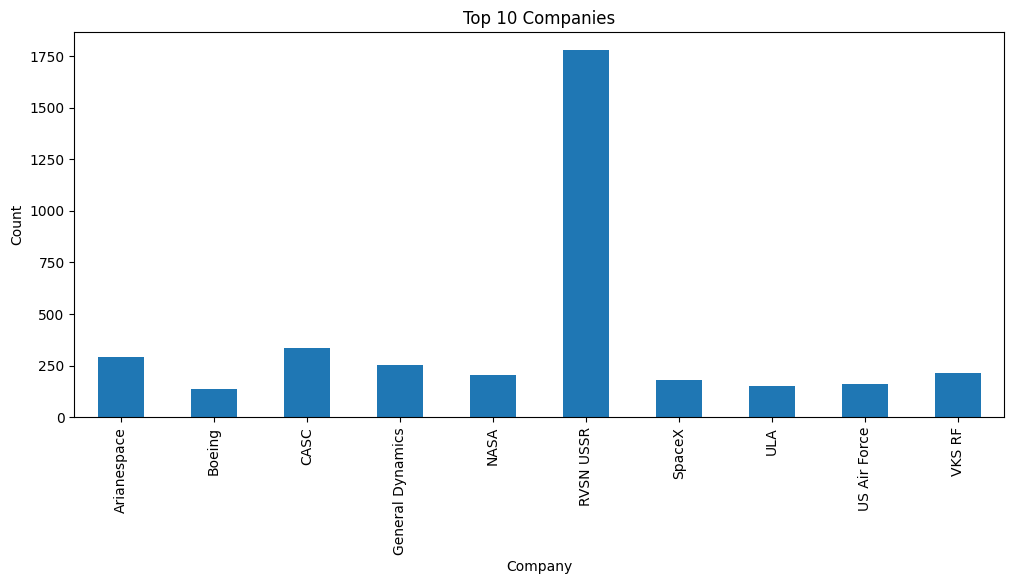

In [ ]:
plt.figure(figsize=(12,5))
df['Company'].value_counts().head(10).sort_index().plot(kind='bar')
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Top 10 Companies")
plt.xticks(rotation=90)
plt.show()